# DFT Scalloping Loss

*Scalloping* is the term used to describe magnitude fluctuations in the output of the DFT. For the case where there is no input windowing, the scalloping loss can be approximated by looking at the composite envelope of multiple sinc functions placed at the DFT bin centers. The maximum scalloping loss occurs half way between DFT bins, and has a loss of about 36.3%.

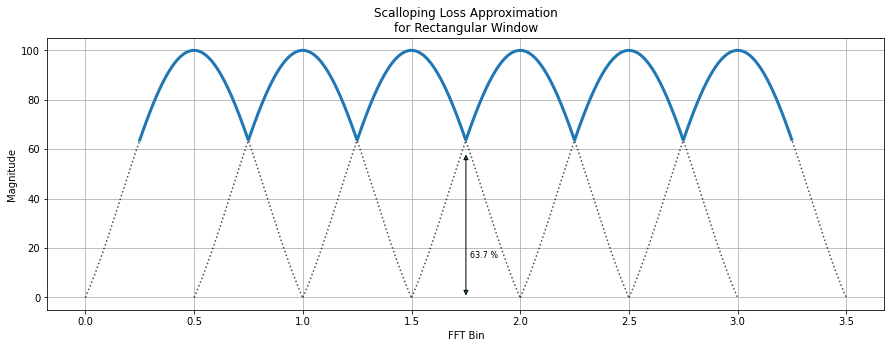

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of DFT bins to plot sincs for
N = 6

# Create sinc main lobe
sinc_resolution = 1000
k = np.linspace(-1, 1, sinc_resolution)
sinc_main_lobe = np.sin(np.pi * k)/(np.pi * k)

# Plot overlapping sinc main lobes
fig, ax = plt.subplots(figsize=(15, 5))
ax.grid()
for bin in range(N):
    start_idx = int(bin * sinc_resolution/2)
    stop_idx = int((bin + 2) * sinc_resolution/2)
    m = np.arange(start_idx, stop_idx)/sinc_resolution
    ax.plot(m, 100*sinc_main_lobe, 'k:', alpha=0.7)

# Create a 2D array with sinc lobe at each FFT bin
sinc_arr = np.zeros((N, int((N+1)/2 * sinc_resolution)))
for bin in range(N):
    start_idx = int(bin * sinc_resolution/2)
    stop_idx = int((bin + 2) * sinc_resolution/2)
    sinc_arr[bin, start_idx:stop_idx] = sinc_main_lobe

# Calculate the envelope of the overlapping sinc functions
sinc_env = np.max(sinc_arr, axis=0)

# Find the maximum scalloping loss
max_scalloping_loss = min(
    sinc_env[int(0.5*sinc_resolution): int(1.5*sinc_resolution)])

# Truncate the sinc envelope such that the endpoints are at the 
# max scalloping loss and overlay the envelope on the sinc functions
sinc_env_trunc_start_idx = np.argmax(sinc_env >= max_scalloping_loss)
sinc_env_trunc_end_idx = len(
    sinc_env) - np.argmax(sinc_env[::-1] >= max_scalloping_loss) - 1
sinc_env_trunc = sinc_env[sinc_env_trunc_start_idx: sinc_env_trunc_end_idx]
x_sinc_env_trunc = np.arange(
    sinc_env_trunc_start_idx, sinc_env_trunc_end_idx)/sinc_resolution
ax.plot(x_sinc_env_trunc, 100*sinc_env_trunc, linewidth=3)

# Plot max scalloping loss arrow
ax.annotate('', xy=((N+1)/4, 0),  xycoords='data',
            xytext=((N+1)/4, 92*max_scalloping_loss), textcoords='data',
            arrowprops=dict(arrowstyle='<|-|>'))
ax.text((N+1)/4 + 0.02, 100 * max_scalloping_loss/4,
        '{:.1f} %'.format(100*max_scalloping_loss), ha='left', fontsize=8)

# Label Plot
ax.set_xlabel('FFT Bin')
ax.set_ylabel('Magnitude')
ax.set_title('Scalloping Loss Approximation\nfor Rectangular Window')
pass